# Introduction

## Preliminary Information

Cardiovascular diseases (CVDs) are the **number 1 cause of death globally**, taking an estimated 17.9 million lives each year, which accounts for **31% of all deaths worlwide**.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need **early detection** and management wherein a machine learning model can be of great help. 

[https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data](https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data)



## About The Data

| Column | Description |
|---|---|
| Anaemia | Indicates decrease of red blood cells or hemoglobin. |
| Creatinine Phosphokinase | It is an enzyme present in the heart, whose elevated levels in the bloodstream indicate muscle or cardiac damage. |
| Diabetes | It is a chronic medical condition characterized by elevated blood sugar levels resulting from insufficient insulin production or the body's inability to effectively use insulin. |
| Ejection Fraction | It is a measure of the percentage of blood that the heart's left ventricle pumps out with each contraction, providing an assessment of the heart's pumping efficiency; a lower EF may indicate heart dysfunction or failure. |
| Blood Pressure | Blood pressure is the force exerted by circulating blood against the walls of arteries. |
| Platelets | platelets help prevent excessive bleeding by forming blood clots at the site of vascular injury. |
| Serum Creatinine | Serum creatinine is a waste product generated by muscle metabolism that is filtered out of the blood by the kidneys. |
|Serum Sodium | Serum sodium refers to the concentration of sodium ions in the liquid component of blood. |
| sex | The sex of the patient. |
| Smoking | If the patient smokes actively or ever did in past. |
| Time | It is the time of the patient's follow-up visit for the disease in months. |

## Packages and Dependencies

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Color Palette

In [43]:
pink = "#EB84AC"

# Data Preparation

## Load our data

In [15]:
df = pd.read_csv("Data/heart_failure_clinical_records_dataset.csv")

In [16]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Clean our data

In [18]:
# Cleaning the data: removing blank lines and null values

# Checking for null values in the dataset
null_values = df.isnull().sum()

In [19]:
null_values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [21]:
# Checking if there are any blank lines (all values are NaN)
blank_lines = df.isna().all(axis=1).sum()

In [10]:
blank_lines

0

In [22]:
# Removing any rows with null values
df_cleaned = df.dropna()

In [12]:
# Displaying the null value count and blank line count, and the first few rows of the cleaned dataframe
null_values, blank_lines, df_cleaned.head()

(age                         0
 anaemia                     0
 creatinine_phosphokinase    0
 diabetes                    0
 ejection_fraction           0
 high_blood_pressure         0
 platelets                   0
 serum_creatinine            0
 serum_sodium                0
 sex                         0
 smoking                     0
 time                        0
 DEATH_EVENT                 0
 dtype: int64,
 0,
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 0  75.0        0                       582         0                 20   
 1  55.0        0                      7861         0                 38   
 2  65.0        0                       146         0                 20   
 3  50.0        1                       111         0                 20   
 4  65.0        1                       160         1                 20   
 
    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
 0                    1  265000.00           

In [24]:
df_cleaned = df_cleaned.rename(columns={'DEATH_EVENT': 'death_event'})

In [25]:
df_cleaned.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Exploratory Analysis

### Histogram

In [37]:
max(df_cleaned["age"])

95.0

In [38]:
min(df_cleaned["age"])

40.0

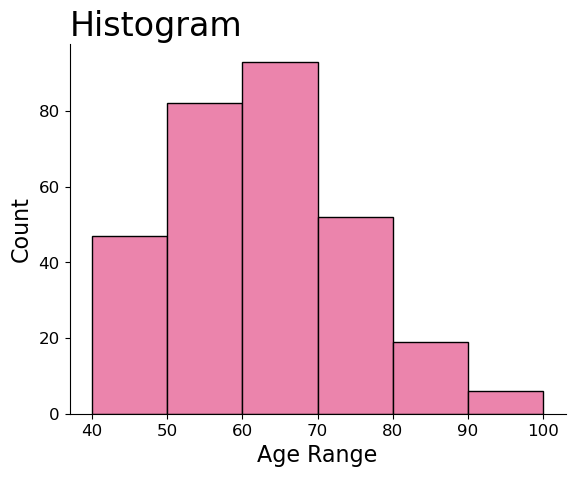

In [69]:
Figure1, Axes1 = plt.subplots()

Axes1.hist(df["age"],
           bins = [40, 50, 60, 70, 80, 90, 100],
           edgecolor = "black",
           color = pink)

Axes1.spines["top"].set_visible(False)
Axes1.spines["right"].set_visible(False)
Axes1.yaxis.set_tick_params(labelsize = 12)
Axes1.xaxis.set_tick_params(labelsize = 12)


plt.title(label = "Histogram",
          loc = "left",
        fontsize = 24)
plt.ylabel(ylabel = "Count",
           fontsize = 16)
plt.xlabel(xlabel = "Age Range",
           fontsize = 16)

plt.savefig(fname = "./Images/Figure1",
            dpi = 400)

plt.show()

(array([47., 82., 93., 52., 19.,  6.]),
 array([ 40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 6 artists>)

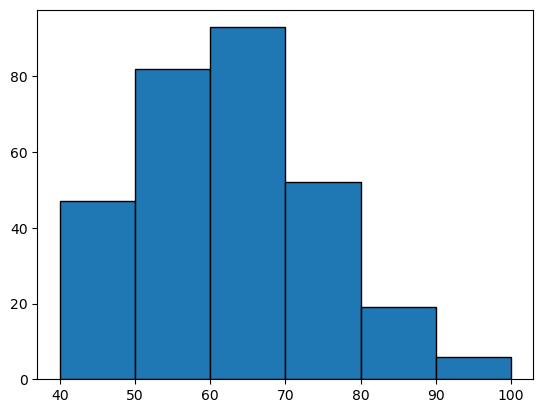

In [41]:
plt.hist(df_cleaned["age"],
         edgecolor = "black",
         bins = [40,50,60,70,80,90,100])

In [33]:
df_cleaned[df_cleaned["age"] > 85]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
16,87.0,1,149,0,38,0,262000.00,0.90,140,1,0,14,1
26,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1
119,86.0,0,582,0,38,0,263358.03,1.83,134,0,0,95,1
289,90.0,1,337,0,38,0,390000.00,0.90,144,0,0,256,0


In [ ]:
Figure2, Axes1 = plt.subplots()

Axes1.scatter(DF["age"],
              DF["creatinine_phosphokinase"])
plt.title(label= "Age and CPK")
plt.grid()
plt.show()

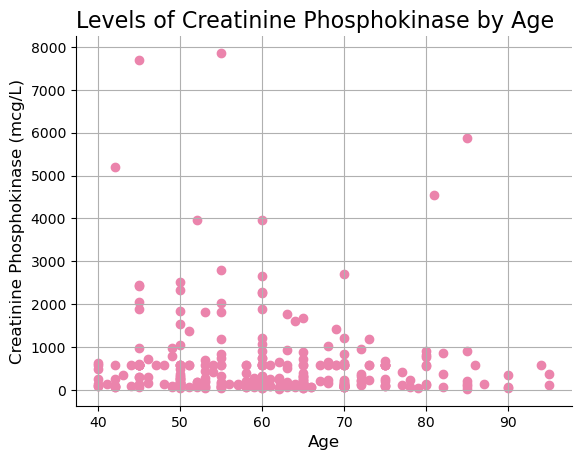

In [79]:
Figure2, Axes2 = plt.subplots()

Axes2.scatter(df_cleaned["age"],
              df_cleaned["creatinine_phosphokinase"],
              color = pink)

Axes2.spines["top"].set_visible(False)
Axes2.spines["right"].set_visible(False)

Axes2.yaxis.set_tick_params(labelsize = 10)
Axes2.xaxis.set_tick_params(labelsize = 10)


plt.title(label = "Levels of Creatinine Phosphokinase by Age",
          loc = "left",
        fontsize = 16)
plt.ylabel(ylabel = "Creatinine Phosphokinase (mcg/L)",
           fontsize = 12)
plt.xlabel(xlabel = "Age",
           fontsize = 12)
plt.grid()

plt.savefig(fname = "./Images/Figure2",
            dpi = 400)

plt.show()

# Analysis

# Machine Learning

# Acknowledgements

**Citation**

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). [(link)](https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)

**License**

CC BY 4.0

**Splash icon**

Icon by Freepik, available on Flaticon.

**Splash banner**

Wallpaper by jcomp, available on Freepik.


